In [70]:
import dataprep
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,chi2
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [71]:
df=pd.read_csv("Sales.csv")
df.sample(5)

,TV,Radio,Social_Media,Influencer,Sales
101,87.0,33.707898,3.327273,Nano,309.361668
585,64.0,27.024803,3.399218,Macro,226.754031
1376,51.0,16.949748,1.348301,Mega,176.006836
61,91.0,25.045557,6.109370,Macro,322.100496
551,55.0,10.569175,2.990738,Mega,194.997446


In [72]:
df.isnull().sum()

TV              10
Radio            4
Social_Media     6
Influencer       0
Sales            6
dtype: int64

In [73]:
len(df)

4572

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [75]:
df.describe()

,TV,Radio,Social_Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [76]:
df=df.rename(columns={'Social_Media' : 'SocialMedia'})

In [77]:
df.describe()

,TV,Radio,SocialMedia,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


**Data Cleaning**

In [78]:
df.TV=df.TV.fillna(df.TV.mean())
df.Radio=df.Radio.fillna(df.Radio.mean())
df.SocialMedia=df.SocialMedia.fillna(df.SocialMedia.mean())
df.Sales=df.Sales.fillna(df.Sales.median())

**Using One Hot Encoding to replace Categorical values with numerical values**

In [79]:
df=pd.get_dummies(df,drop_first=True)
df

,TV,Radio,SocialMedia,Sales,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,1,0,0
1,13.0,9.237765,2.409567,46.677897,1,0,0
2,41.0,15.886446,2.913410,150.177829,1,0,0
3,83.0,30.020028,6.922304,298.246340,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,1,0
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,1,0
4570,71.0,17.534640,1.940873,253.610411,0,0,0


In [80]:
df.head()

,TV,Radio,SocialMedia,Sales,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,1,0,0
1,13.0,9.237765,2.409567,46.677897,1,0,0
2,41.0,15.886446,2.913410,150.177829,1,0,0
3,83.0,30.020028,6.922304,298.246340,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,1,0


In [81]:
#from dataprep.eda import create_report
#report = create_report(df, title='My Report')
#report

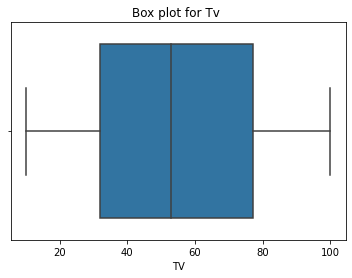

In [82]:
sns.boxplot(df.TV)
plt.title("Box plot for Tv ")
plt.show()

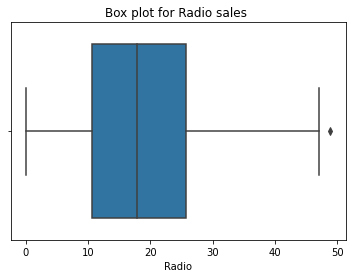

In [83]:
sns.boxplot(df.Radio)
plt.title("Box plot for Radio sales ")
plt.show()

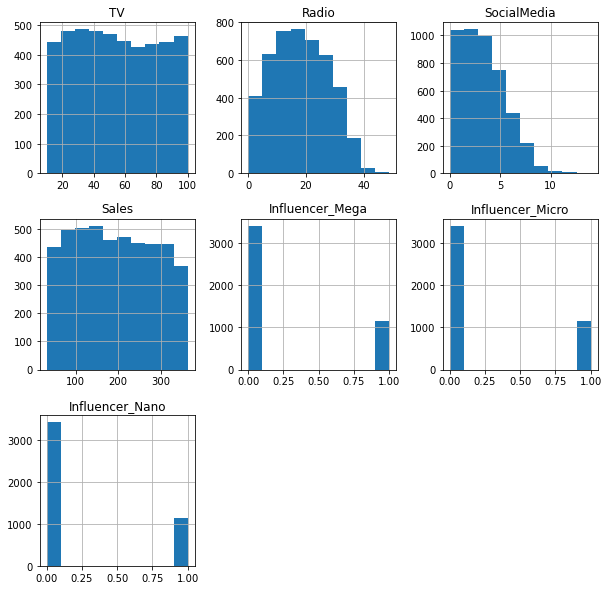

In [84]:
df.hist(figsize=(10,10))
plt.show()

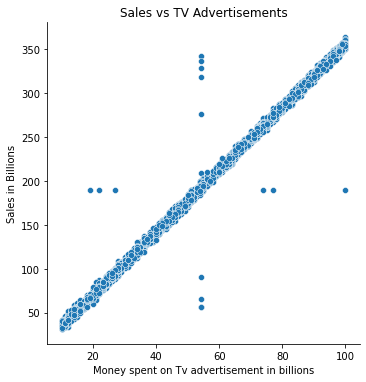

In [57]:
sns.relplot("TV","Sales",data=df)
#plt.scatter(df.TV,df.Sales,color='magenta')
plt.title("Sales vs TV Advertisements")
plt.xlabel("Money spent on Tv advertisement in billions")
plt.ylabel("Sales in Billions")
plt.show()

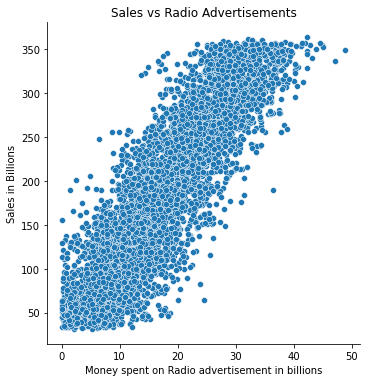

In [58]:
sns.relplot("Radio","Sales",data=df)
#plt.scatter(df.Radio,df.Sales,color='magenta')
plt.title("Sales vs Radio Advertisements")
plt.xlabel("Money spent on Radio advertisement in billions")
plt.ylabel("Sales in Billions")
plt.show()


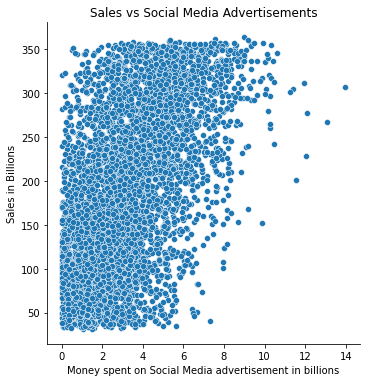

In [56]:
sns.relplot(x="SocialMedia",y="Sales",data=df)
#plt.scatter(df.SocialMedia,df.Sales,color='magenta')
plt.title("Sales vs Social Media Advertisements")
plt.xlabel("Money spent on Social Media advertisement in billions")
plt.ylabel("Sales in Billions")
plt.show()

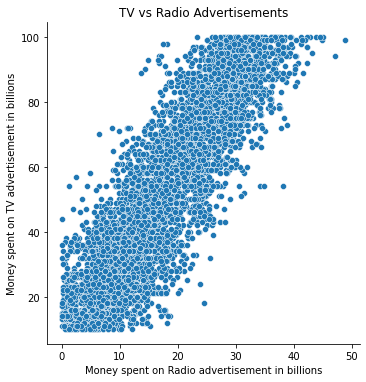

In [54]:
sns.relplot(x ="Radio", y ="TV",
            data = df)
plt.title("TV vs Radio Advertisements")
plt.xlabel("Money spent on Radio advertisement in billions")
plt.ylabel("Money spent on TV advertisement in billions")
plt.show()

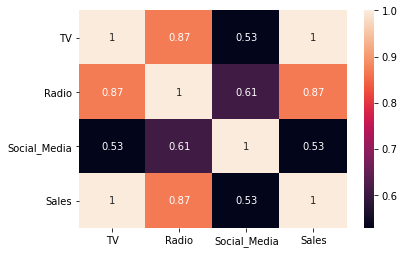

In [181]:
sns.heatmap(sales_df.corr(),annot=True)
plt.show()

**High MultiCorrelationship  between independent variables Radio and TV which may results multicollinearity**

In [59]:
X=df.drop('Sales',axis=1).values
y=df[['Sales']].values

**Train test and splting the data**

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [61]:
X_train.shape

(3429, 6)

In [62]:
X_test.shape

(1143, 6)

In [63]:
y_train

array([[221.9271739 ],
       [ 52.87884782],
       [ 54.88491943],
       ...,
       [156.982317  ],
       [317.4710443 ],
       [138.6769979 ]])

**Cross validating the models**

In [187]:
cv_LR=cross_val_score(LinearRegression(),X_train,y_train,cv=5)
cv_DT=cross_val_score(tree.DecisionTreeRegressor(),X_train,y_train,cv=5)
cv_KN=cross_val_score(KNeighborsRegressor(),X_train,y_train,cv=5)
cv_BG=cross_val_score(BaggingRegressor(),X_train,y_train,cv=5)

In [188]:
print("cross val score of Linear regression Model :",np.mean(cv_LR))
print("cross val score of DecisionTreeRegressor Model :",np.mean(cv_DT))
print("cross val score of KNeighborsRegressor Model :",np.mean(cv_KN))
print("cross val score of BaggingRegressor Model :",np.mean(cv_BG))

cross val score of Linear regression Model : 0.9936825052021423
cross val score of DecisionTreeRegressor Model : 0.9919252103467959
cross val score of KNeighborsRegressor Model : 0.9937048414256315
cross val score of BaggingRegressor Model : 0.993344786885015


**As we can see our k neighbors model working well with training data so we will use same model to predict test data.**

In [189]:
BG=BaggingRegressor()
Bg=BG.fit(X_train,y_train)
Bg.score(X_train,y_train)

0.9991893105317892

In [190]:
y_pred=Bg.predict(X_test)
Bg.score(X_test,y_test)

0.9854246400539952

In [191]:
r2_score(y_test,y_pred)

0.9854246400539952

In [192]:
(mean_squared_error(y_test,y_pred))**0.5

11.261015373517518

In [193]:
mean_absolute_error(y_test,y_pred)

3.500123606898513

**Using Linear Regression**

In [194]:
lr=LinearRegression(normalize=True)
lr=lr.fit(X_train,y_train)
score=lr.score(X_train,y_train)
score

0.9937465546364329

In [195]:
lr.intercept_

array([-0.29685235])

In [196]:
lr.coef_

array([[3.51152386, 0.12581539, 0.06695927, 0.54311194, 0.42069639,
        0.41022783]])

In [197]:
y_pred=lr.predict(X_test)
lr.score(X_test,y_test)

0.9922343760768267

In [198]:
mean_absolute_error(y_test,y_pred)

2.910401546726327

**Interpretation**

**sales=3.51191472 * TV + 0.11950823 * Radio + 0.06695927 * socialMedia + 0.54 * mega + 0.42 * micro+ 0.41 * Nano - 0.29**

**For every 1 unit increase in TV, the sales will increase by 3.51**

**For every 1 unit  increase in SocialMedia, the sales will increase only 0.066**

**If we do not spend any promotional budget, our sales is predicted to decrease by - 0.3 units**

**Our Linear Regression Model results in 99.2% accuracy, 2.9 MAE, and the above regression equation.**

**Multi Collinearity Check between variables**

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [200]:
df.SocialMedia=np.log(df.SocialMedia)

In [218]:
X=df.drop('Sales',axis=1)
calc_vif(X)

,variables,VIF
0,TV,19.126346
1,Radio,19.563937
2,SocialMedia,2.189761
3,Influencer_Mega,1.513491
4,Influencer_Micro,1.520520
5,Influencer_Nano,1.511588


In [219]:
X=df.drop(['Sales','Radio'],axis=1)
calc_vif(X)

,variables,VIF
0,TV,3.642586
1,SocialMedia,2.035608
2,Influencer_Mega,1.509306
3,Influencer_Micro,1.514873
4,Influencer_Nano,1.509256


In [220]:
y=df['Sales']

In [221]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [222]:
lr=LinearRegression(normalize=True)
lr=lr.fit(X_train,y_train)
scoreM=lr.score(X_train,y_train)
scoreM

0.9937046998548363

In [223]:
lr.intercept_

-0.09396355439542958

In [224]:
lr.coef_

array([3.54933087, 0.29908298, 0.55756043, 0.44749848, 0.40596206])

In [225]:
y_pred=lr.predict(X_test)
lr.score(X_test,y_test)

0.9921777987362211

In [226]:
mean_absolute_error(y_test,y_pred)

2.863147927828667

**So dropping a feature Radio which has high multicollinearity doesn't effect the model much.**

**Using Statsmodels**

**Including All Features**

In [228]:
import statsmodels.api as sm
X=df.drop('Sales',axis=1)
X = sm.add_constant(X)
y=df[['Sales']]
est = sm.OLS(y, X).fit()
predictions=est.summary()
print(predictions)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.139e+05
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:42:55   Log-Likelihood:                -15747.
No. Observations:                4572   AIC:                         3.151e+04
Df Residuals:                    4565   BIC:                         3.155e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1373      0.329  

**Now Dropping Radio Feature**

In [229]:
import statsmodels.api as sm
X=df.drop(['Sales','Radio'],axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
predictions=est.summary()
print(predictions)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.359e+05
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:43:02   Log-Likelihood:                -15762.
No. Observations:                4572   AIC:                         3.154e+04
Df Residuals:                    4566   BIC:                         3.157e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0228      0.329  